# Linear Regression with One Feature

## Dataset used:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte I: una característica
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

# 1. Dataset visualization:

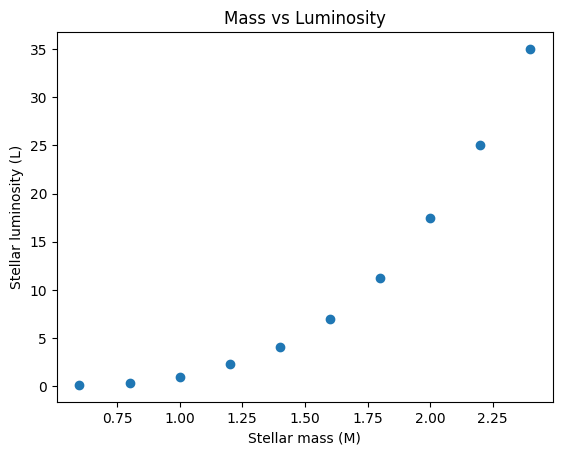

In [2]:
plt.figure()
plt.scatter(M, L)
plt.xlabel("Stellar mass (M)")
plt.ylabel("Stellar luminosity (L)")
plt.title("Mass vs Luminosity")
plt.show()

# 2. Model and loss:

## Prediction:

In [3]:
def predict(M, w, b):
    """Compute the predicted y values for given x, using f_{w,b}(x) = w x + b."""
    return w * M + b

w_test = 0.0
b_test = 0.0
y_hat_test = predict(M, w_test, b_test)
print("First 5 predictions with w=0, b=0:", y_hat_test[:5])

First 5 predictions with w=0, b=0: [0. 0. 0. 0. 0.]


## MSE:

In [4]:
def compute_cost(M, L, w, b):
    m = M.shape[0]
    L_hat = w * M + b  # f_{w,b}(x)
    errors = L_hat - L
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

print("Cost with w=0, b=0:", compute_cost(M, L, w_test, b_test))

Cost with w=0, b=0: 117.69675000000001


# 3. Cost surface:

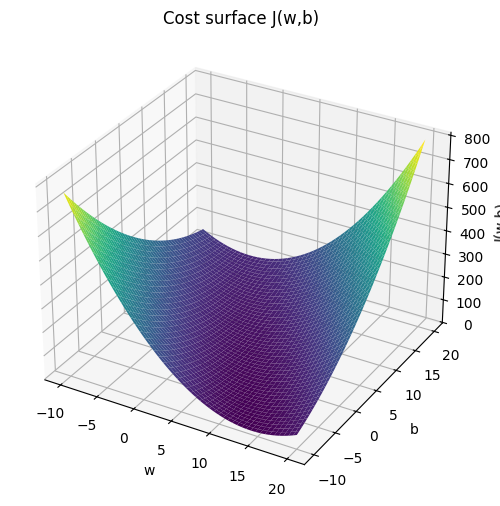

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

w_values = np.linspace(-10, 20, 200)
b_values = np.linspace(-10, 20, 200)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i, j], B[i, j])


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()


# 4. Gradients:

In [6]:
def compute_gradients(M, L, w, b):
    m = M.shape[0]
    L_hat = w * M + b  # f_{w,b}(x)
    errors = L_hat - L

    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -21.523 -10.36


# 5. Gradient descent (non-vectorized):

In [7]:
def compute_gradients(M, L, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m_local = len(M)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * M[i] + b
        error = f_wb - L[i]
        sum_dw += error * M[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -21.523000000000003 -10.36


In [17]:
def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    """Run gradient descent using explicit loops for gradients and cost."""
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_iterations, history_costs

alpha = 0.01
num_iterations = 1000

w_init = 1.0
b_init = 1.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 1.1744, b= 1.0786, cost= 85.5063
Iteration  100: w= 6.6737, b= 1.8537, cost= 32.5834
Iteration  200: w= 7.8233, b= 0.2335, cost= 28.6173
Iteration  300: w= 8.7582, b=-1.3072, cost= 25.3688
Iteration  400: w= 9.6053, b=-2.7106, cost= 22.6809
Iteration  500: w=10.3758, b=-3.9872, cost= 20.4569
Iteration  600: w=11.0766, b=-5.1484, cost= 18.6168
Iteration  700: w=11.7141, b=-6.2047, cost= 17.0943
Iteration  800: w=12.2940, b=-7.1655, cost= 15.8345
Iteration  900: w=12.8215, b=-8.0394, cost= 14.7922

Learned parameters:
w = 13.296745736349797
b = -8.826839547227573


## 6. Gradient descent (vectorized):

In [9]:
def compute_gradients_vectorized(M, L, w, b):
    m = M.shape[0]
    y_hat = w * L + b  # f_{w,b}(x)
    errors = y_hat - L


    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients_vectorized(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)


Gradients at w=0, b=0: -21.523 -10.36


In [20]:
def gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 1400: w=14.8709, b=-11.4350, cost= 11.6788
Iteration 1600: w=15.4334, b=-12.3670, cost= 11.0847
Iteration 1800: w=15.8989, b=-13.1383, cost= 10.6780

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044


## 7. Convergence:

## Non vectorized:

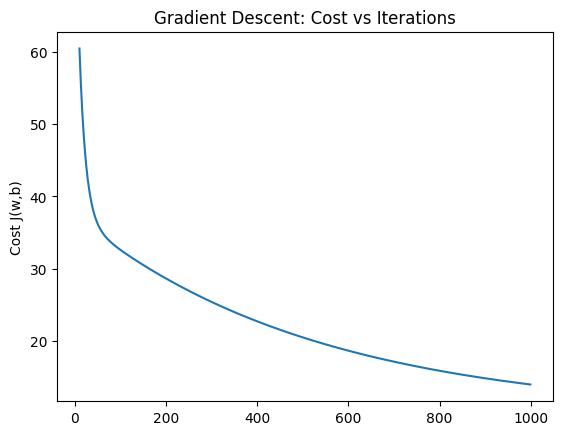

In [21]:

plt.figure()
plt.plot(it_hist[10:], cost_hist[10:])  # skip the first pointplt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

## Vectorized:


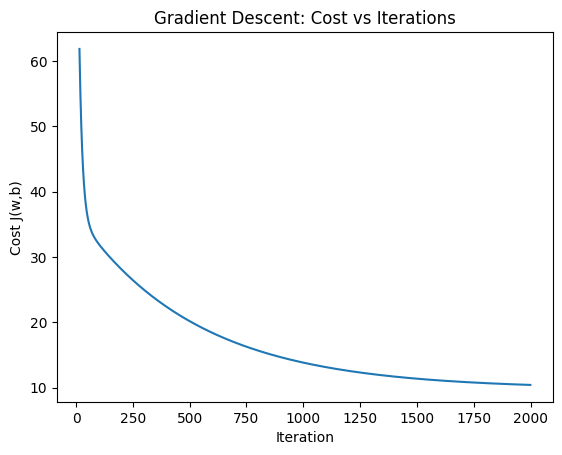

In [22]:

iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])  # skip the first points
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

### Comments:

The cost function is decreasing smoothly as the number of iterations increases, this indicates that the gradient descent is covering correctly. At the start, with the first iterations the loss drops fast, showing that the convergence move fast to the minimum.

With the pass of the time, the cost decreases became more gradual, reaching to optimal values for w and b. The curve doesnt show sudden changes, suggesting that the learning rate is stable.


## 8. Experiments:

### The original gradient is with 0.01 in this case I am going to use three different values, 0.0001, 0.05, 0.009

## alpha = 0.0001

In [28]:
def gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history_00001 = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history_00001.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_00001

alpha = 0.0001
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned_00001, b_learned_00001, history_00001 = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 0.0022, b= 0.0010, cost=117.6397
Iteration  200: w= 0.4187, b= 0.1999, cost=106.9871
Iteration  400: w= 0.8086, b= 0.3828, cost= 97.7082
Iteration  600: w= 1.1739, b= 0.5509, cost= 89.6243
Iteration  800: w= 1.5160, b= 0.7051, cost= 82.5797
Iteration 1000: w= 1.8366, b= 0.8465, cost= 76.4394
Iteration 1200: w= 2.1372, b= 0.9758, cost= 71.0857
Iteration 1400: w= 2.4190, b= 1.0939, cost= 66.4162
Iteration 1600: w= 2.6833, b= 1.2016, cost= 62.3420
Iteration 1800: w= 2.9313, b= 1.2995, cost= 58.7856

Learned parameters:
w = 3.1630361982290838
b = 1.38796195986714


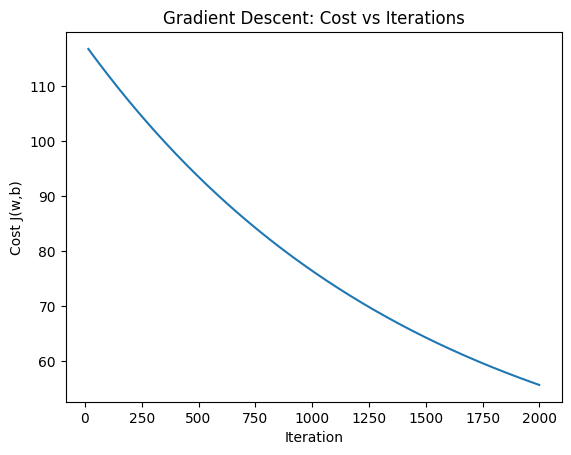

In [29]:

iterations = [it for it, c in history_00001]
costs = [c for it, c in history_00001]

plt.figure()
plt.plot(iterations[15:], costs[15:])  # skip the first points
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

## alpha = 0.05

In [34]:
def gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history_005 = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history_005.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_005

alpha = 0.05
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned_005, b_learned_005, history_005 = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 1.0762, b= 0.5180, cost= 91.6326
Iteration  200: w=13.3959, b=-8.9910, cost= 13.7695
Iteration  400: w=16.2976, b=-13.7989, cost= 10.3907
Iteration  600: w=17.4209, b=-15.6600, cost=  9.8844
Iteration  800: w=17.8557, b=-16.3804, cost=  9.8085
Iteration 1000: w=18.0240, b=-16.6593, cost=  9.7972
Iteration 1200: w=18.0892, b=-16.7673, cost=  9.7954
Iteration 1400: w=18.1144, b=-16.8091, cost=  9.7952
Iteration 1600: w=18.1241, b=-16.8252, cost=  9.7952
Iteration 1800: w=18.1279, b=-16.8315, cost=  9.7951

Learned parameters:
w = 18.129374665860784
b = -16.833916358785014


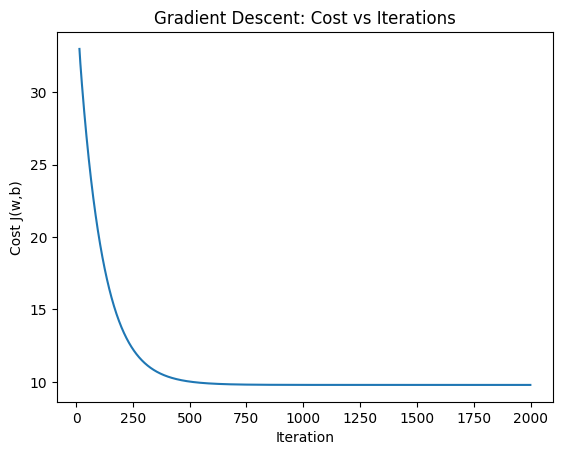

In [32]:

iterations = [it for it, c in history_005]
costs = [c for it, c in history_005]

plt.figure()
plt.plot(iterations[15:], costs[15:])  # skip the first points
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

## alpha = 0.009


In [43]:
def gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history_009 = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history_009.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_009

alpha = 0.009
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned_009, b_learned_009, history_009 = gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 0.1937, b= 0.0932, cost=112.6415
Iteration  200: w= 7.7671, b= 0.3134, cost= 28.8020
Iteration  400: w= 9.3997, b=-2.3699, cost= 23.3099
Iteration  600: w=10.7683, b=-4.6375, cost= 19.4049
Iteration  800: w=11.9224, b=-6.5497, cost= 16.6282
Iteration 1000: w=12.8955, b=-8.1620, cost= 14.6539
Iteration 1200: w=13.7161, b=-9.5217, cost= 13.2500
Iteration 1400: w=14.4081, b=-10.6682, cost= 12.2517
Iteration 1600: w=14.9916, b=-11.6349, cost= 11.5419
Iteration 1800: w=15.4836, b=-12.4502, cost= 11.0372

Learned parameters:
w = 15.896579679312634
b = -13.134447348744443


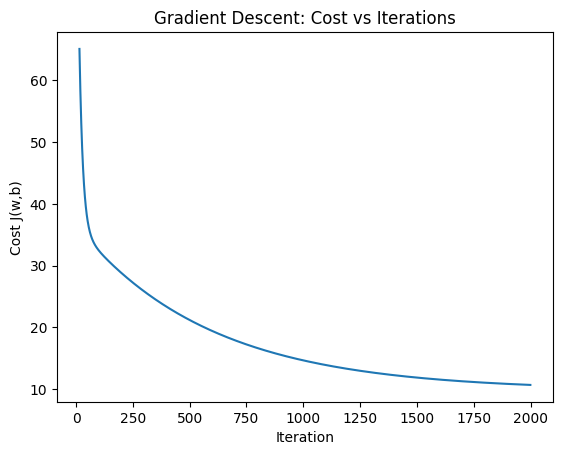

In [44]:

iterations = [it for it, c in history_009]
costs = [c for it, c in history_009]

plt.figure()
plt.plot(iterations[15:], costs[15:])  # skip the first points
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

## 9. Final fit plot:

In [ ]:
plt.figure()
plt.scatter(M, L, label="Data")
y_pred = predict(M, w_learned, b_learned)
plt.plot(M, y_pred, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()